<a href="https://colab.research.google.com/github/FaQ2108/FacundoMauro-Academics-Data-Projects/blob/main/IntAlMachLearn2_MauroFacundo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns

In [ ]:
dataset = pd.read_csv('train.csv')
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#Examinamos la cantidad de filas y columnas del dataset:
dataset.shape

(891, 12)

a) Describir brevemente la cantidad de valores faltantes para cada una de las variables de la base de datos.

In [ ]:
#Ahora vamos a verificar cuantos registros faltan en este dataset:
dataset.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


b) Completar aquellas variables que se encuentran faltantes para las bases de train (“Age”,”fare”, “Cabin”) y test ( “Age”, “Cabin”, “embarked”).

In [ ]:
#Completamos los registros faltantes en la columna 'Age' con la edad promedio del conjunto de edades registradas:
dataset['Age'].fillna(dataset['Age'].mean(), inplace=True)
#Verificamos la columna 'Age' para ver que efectivamente no existan registros faltantes:
dataset.isnull().sum()

<ipython-input-44-e0b541fc4215>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Age'].fillna(dataset['Age'].mean(), inplace=True)


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
#Ahora quiero saber cuales son los valores que puede tomar la columna 'Cabin'.
dataset['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [ ]:
#Procedo a reemplazar los valores faltantes de la columna 'Cabin' con la palabra Unknow(Desconocido):
dataset['Cabin'].fillna('Unknown', inplace=True)
#Verificamos la columna 'Cabin' para ver que efectivamente no existan registros faltantes:
dataset.isnull().sum()

<ipython-input-46-b536c1bafd1c>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Cabin'].fillna('Unknown', inplace=True)


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
#Finalmente verificamos los valores que puede tomar la columna 'Embarked':
dataset['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [ ]:
#Reemplazamos los registros faltantes de la columna 'Embarked' con el valor que mas se repite entre los valores de la columna:
dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace=True)
#Verificamos la columna 'Embarked' para ver que efectivamente no existan registros faltantes:
dataset.isnull().sum()

<ipython-input-48-ba09ed1bc781>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace=True)


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
# Procedemos a cambiar los valores de las columnas 'Sex' y 'Embarked' a valores numéricos:
dataset['Sex'] = dataset['Sex'].map({'male': 0, 'female': 1})
dataset['Embarked'] = dataset['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

c) Ajustar el primer modelo de regresión logística.

In [ ]:
#Procedemos a dividir las variables para su posterior entrenamiento:
feature_cols = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = dataset[feature_cols]
y = dataset.Survived

In [ ]:
#Creamos las 4 variables para train y test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

d) Entrenar y determinar el nivel de accuracy del primer modelo.

In [ ]:
#Definiremos la variable logreg, a la que se le asignará el modelo de regresión lineal, según el uso de Scikit learn.
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

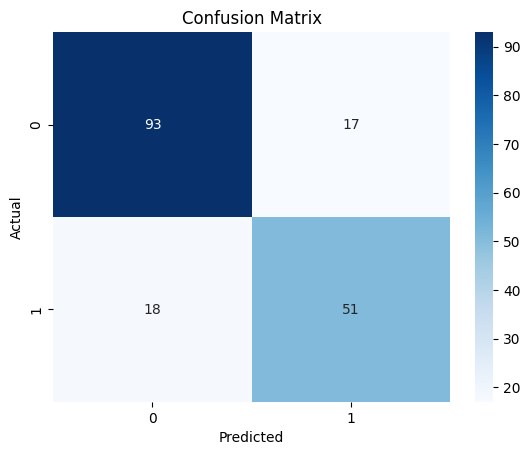

[[93 17]
 [18 51]]


In [ ]:
# Creamos la matriz de confusion para evaluar el modelo:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
# Hacemos el grafico visualmente mas atractivo:
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
print(confusion_matrix)

In [69]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8044692737430168
